In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
df=pd.read_excel("glass.xlsx")
df.head()


,Id Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
from random import sample
df.sample(10)


,Id Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
182,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6
54,55,1.51778,13.21,2.81,1.29,72.98,0.51,9.02,0.00,0.09,1
14,15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1
202,203,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.00,7
81,82,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00,2
186,187,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7
132,133,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,2
110,111,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
149,150,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.00,0.00,3
93,94,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00,2


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [4]:
df.isnull().values.any()
#As the value is false, there are no missing values in the given dataset

False

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


{'whiskers': [<matplotlib.lines.Line2D at 0x1c08e847ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08e856780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08e847978>,
 'medians': [<matplotlib.lines.Line2D at 0x1c08e856fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c08e860438>,
 'means': []}

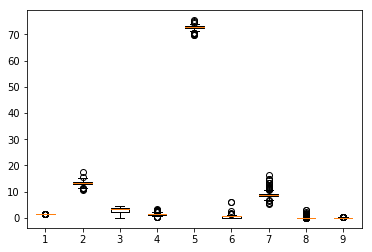

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.boxplot([df["RI"],df["Na"],df["Mg"],df["Al"],df["Si"],df["K"],df["Ca"],df["Ba"],df["Fe"]])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c08e9895c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08e989dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08e989080>],
 'medians': [<matplotlib.lines.Line2D at 0x1c08e993668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c08e993a90>],
 'means': []}

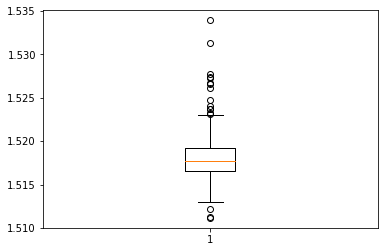

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.boxplot(df["RI"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c08e9e8a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08e9e8f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08e9e8550>],
 'medians': [<matplotlib.lines.Line2D at 0x1c08e9f1b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c08e9f1f60>],
 'means': []}

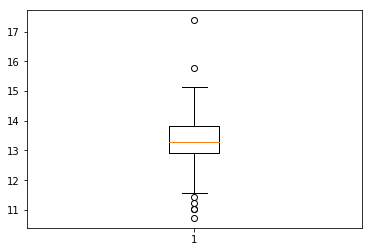

In [7]:
plt.boxplot(df["Na"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c08ea45668>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08ea45eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08ea45128>],
 'medians': [<matplotlib.lines.Line2D at 0x1c08ea4f748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c08ea4fb70>],
 'means': []}

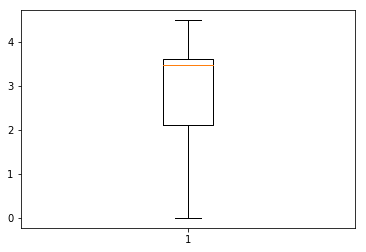

In [8]:
plt.boxplot(df["Mg"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c08db18da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08ea8ba20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08db18c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1c08ea8bf28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c08ea936d8>],
 'means': []}

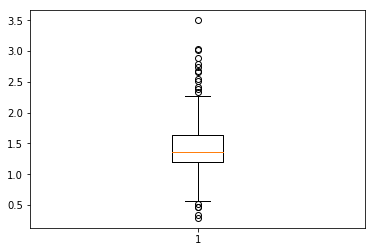

In [9]:
plt.boxplot(df["Al"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c08eadeba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08eae4438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08eade668>],
 'medians': [<matplotlib.lines.Line2D at 0x1c08eae4c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c08eae4d68>],
 'means': []}

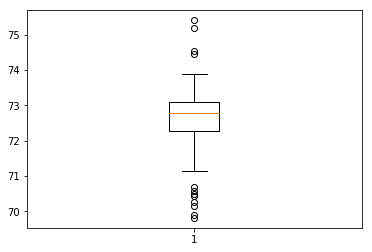

In [10]:
plt.boxplot(df["Si"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c08eb33fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08eb3d898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08eb33a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1c08eb3dda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c08eb46550>],
 'means': []}

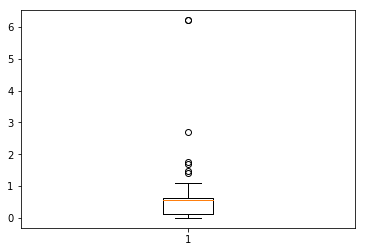

In [11]:
plt.boxplot(df["K"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c08eb93630>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08eb93e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08eb930f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c08eb9d710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c08eb9db70>],
 'means': []}

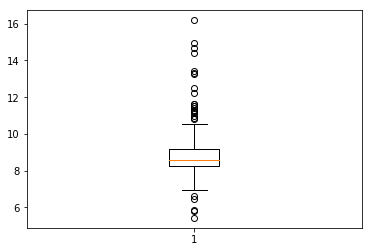

In [12]:
plt.boxplot(df["Ca"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c08ebeca58>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08ebecf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08ebec518>],
 'medians': [<matplotlib.lines.Line2D at 0x1c08ebf4b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c08ebf4f60>],
 'means': []}

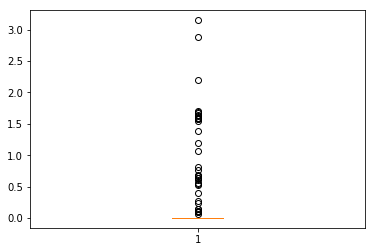

In [13]:
plt.boxplot(df["Ba"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c08ec3ffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c08fc19c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c08ec3fe80>],
 'medians': [<matplotlib.lines.Line2D at 0x1c08fc224a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c08fc228d0>],
 'means': []}

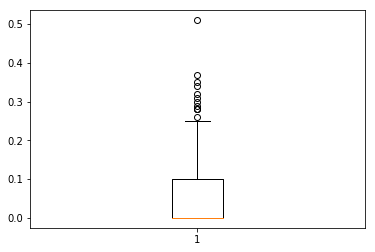

In [14]:
plt.boxplot(df["Fe"])

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [15]:
df["RI"].var()

9.222541371594076e-06

In [16]:
df["Na"].var()

0.6668413672063532

In [17]:
df["Mg"].var()

2.080540390943791

In [18]:
df["Al"].var()

0.24927017901803342

In [19]:
df["Si"].var()

0.5999211881883196

In [20]:
df["K"].var()

0.42535420341362873

In [21]:
df["Ca"].var()

2.0253658483611945

In [22]:
df["Ba"].var()

0.24722699311131596

In [23]:
df["Fe"].var()

0.009494300381729631

In [24]:
#We see that the columns RI,Fe have very low variance and will have no effect on the model, thus droping these
#columns in the below step


In [25]:
df.drop("RI",axis=1,inplace=True)

In [26]:
df.drop("Fe",axis=1,inplace=True)

In [27]:
df.head(n=2)

,Id Number,Na,Mg,Al,Si,K,Ca,Ba,Type_of_glass
0,1,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,2,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1


## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

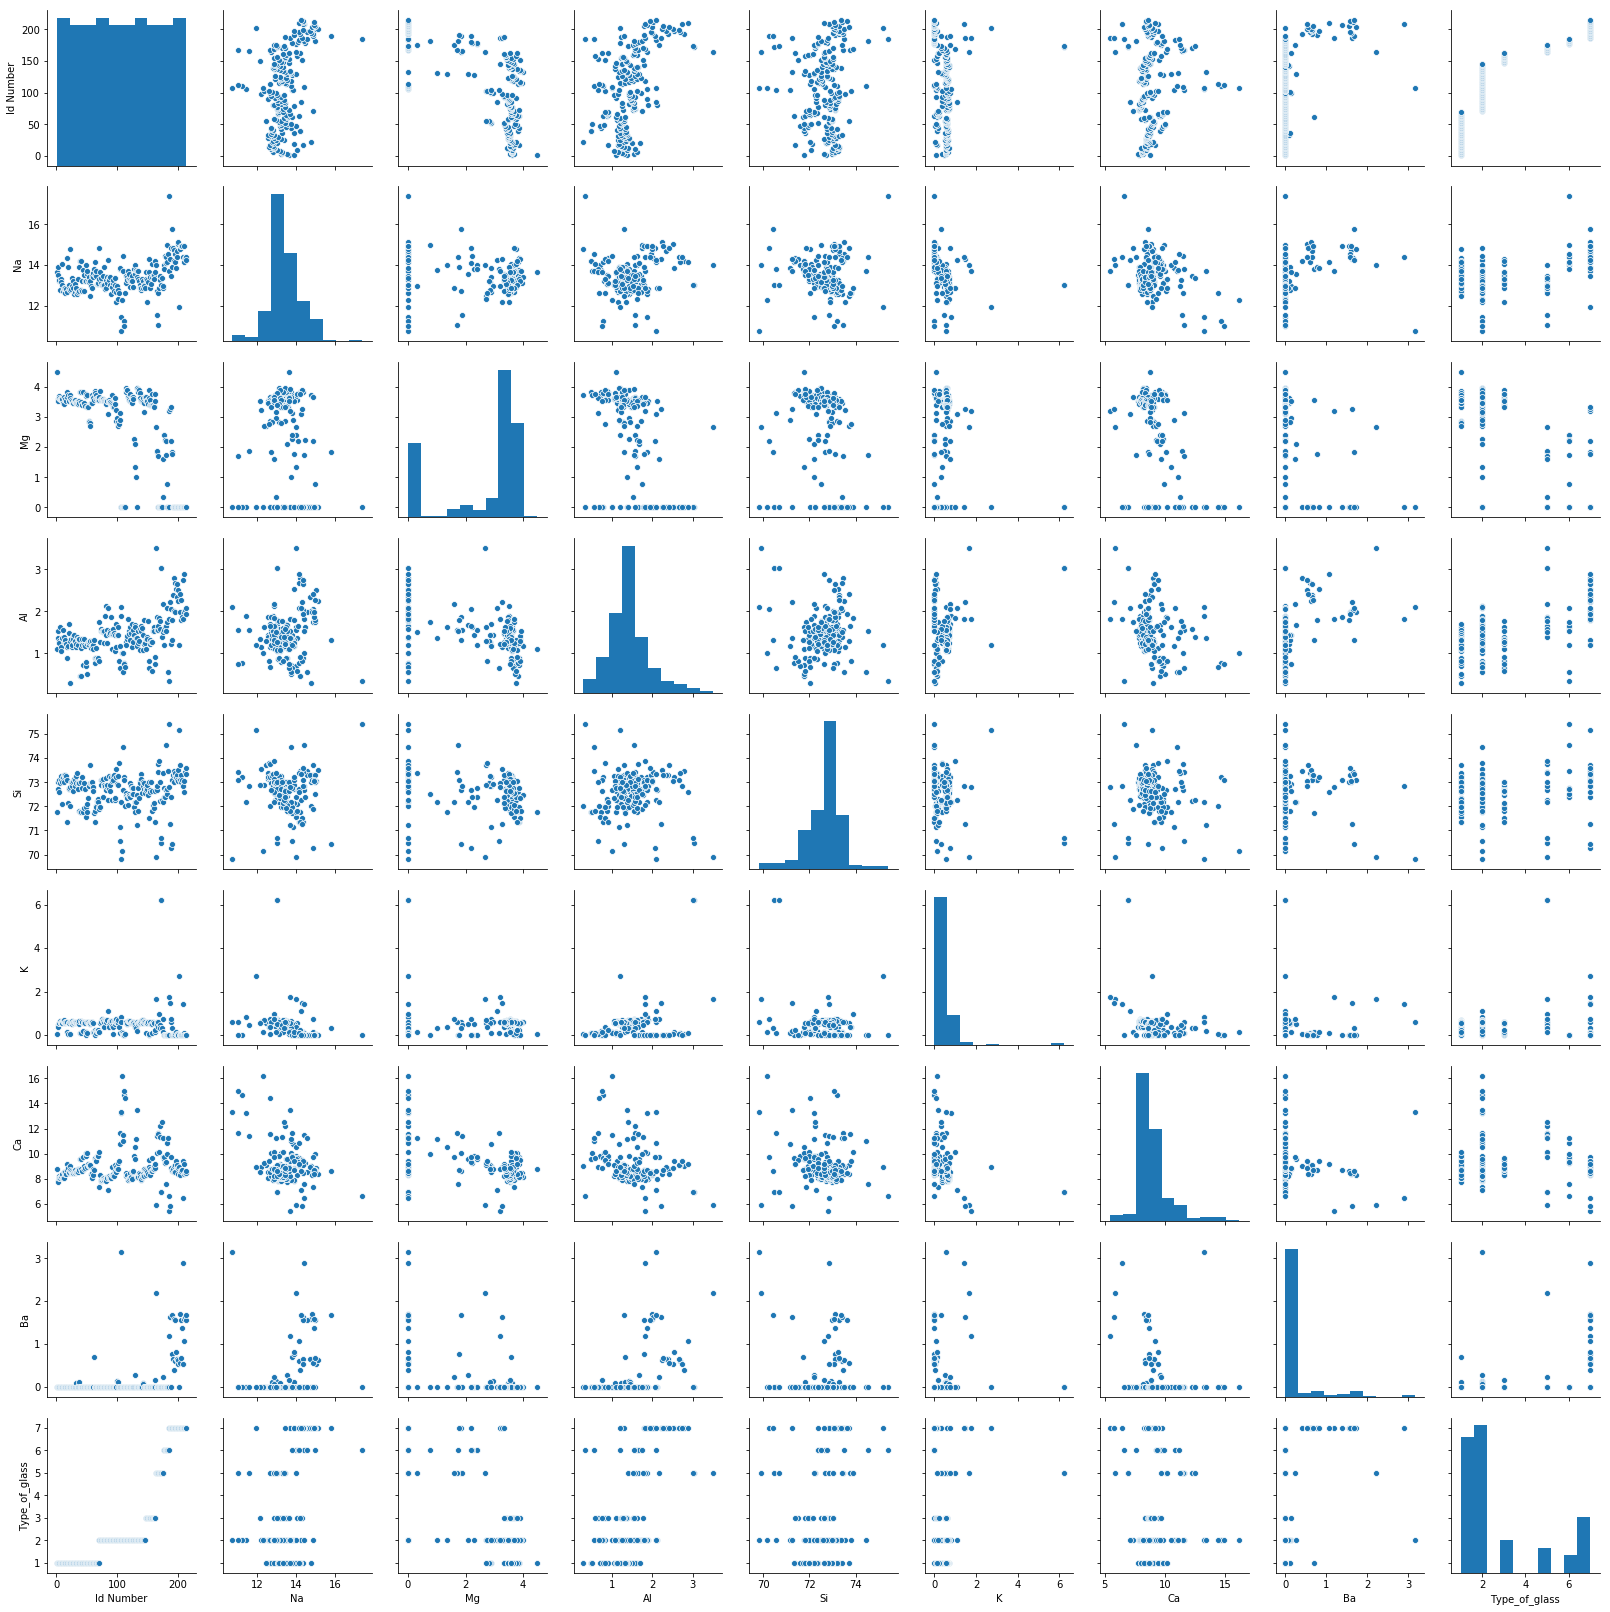

In [28]:
import seaborn as sns
sns.pairplot(df)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [29]:
df.head(n=1)

,Id Number,Na,Mg,Al,Si,K,Ca,Ba,Type_of_glass
0,1,13.64,4.49,1.1,71.78,0.06,8.75,0.0,1


In [30]:
x_ind = df.loc[:,["Na","Mg","Al","Si","K","Ca","Ba"]]
y_dep = df.loc[:,["Type_of_glass"]]


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ind,y_dep, test_size = 0.3, random_state = 1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for i in [3,6,9]:
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    a = accuracy_score(y_test, y_pred)
    print (a)

0.7538461538461538
0.7384615384615385
0.7230769230769231


C:\Users\rachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\rachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\rachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ind,y_dep, test_size = .30, random_state = 1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

test = []
for i in range(1,19,2):
    classifier = KNeighborsClassifier(n_neighbors = i, p = 2)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    a = accuracy_score(y_test, y_pred)
    test.append(1-a)
    print (a)

0.7692307692307693
0.7538461538461538
0.7384615384615385
0.7230769230769231
0.7230769230769231
0.676923076923077
0.7076923076923077
0.7230769230769231
0.7076923076923077


C:\Users\rachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

In [33]:
#Printing the below error values which have arrived as we do compare the ytest and ypred values)
k=list(range(1,19,2))
k
test

[0.23076923076923073,
 0.24615384615384617,
 0.2615384615384615,
 0.27692307692307694,
 0.27692307692307694,
 0.32307692307692304,
 0.29230769230769227,
 0.27692307692307694,
 0.29230769230769227]

## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

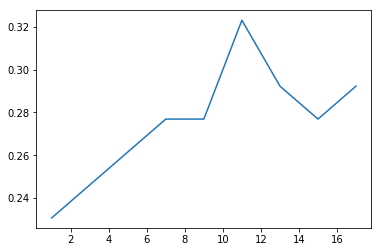

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(k,test)